<a href="https://colab.research.google.com/github/Nikhil2374/Computer-Vision/blob/main/Enhance%20images%20using%20spatial%20and%20frequency%20domain%20filters..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image = cv2.imread('input_image.png', 0)

In [5]:
#  Apply various spatial filters
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0) # 1 Gaussian Filter

In [6]:
average_filtered = cv2.blur(image, (5, 5)) # 2 Average Filter

In [7]:
# 3 High-pass filter
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])
high_pass_filtered = cv2.filter2D(image, -1, high_pass_kernel)

In [8]:
# 4 Sobel Filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_filtered = cv2.magnitude(sobel_x, sobel_y)

In [9]:
# 5 Low-pass filter
f = np.fft.fft2(gaussian_filtered)
fshift = np.fft.fftshift(f)

In [10]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

In [11]:
mask = np.zeros((rows, cols), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask[mask_area] = 1

In [12]:
fshift_filtered = fshift * mask

In [13]:
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

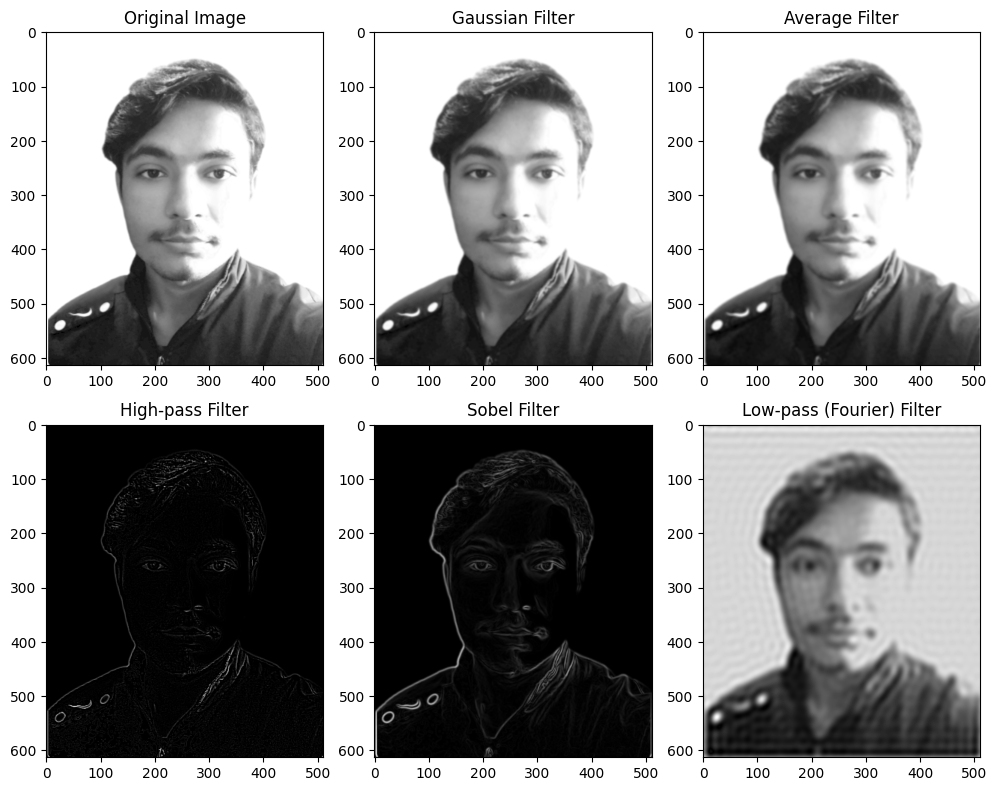

In [14]:
plt.figure(figsize=(10, 8))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Filter')
plt.subplot(233), plt.imshow(average_filtered, cmap='gray'), plt.title('Average Filter')
plt.subplot(234), plt.imshow(high_pass_filtered, cmap='gray'), plt.title('High-pass Filter')
plt.subplot(235), plt.imshow(sobel_filtered, cmap='gray'), plt.title('Sobel Filter')
plt.subplot(236), plt.imshow(img_back, cmap='gray'), plt.title('Low-pass (Fourier) Filter')

plt.tight_layout()
plt.show()